In [134]:
import numpy as np
import xgboost as xgb

In [135]:
def id_change(j):
    id = {}
    for i in range(len(dict)):
        word = dict[i][j]
        if(id.get(word) == None):
            id[word] = 1
        else:
            id[word] = id[word] + 1
    #print(id)
    id_7 = {}
    i = 0
    for k in id.keys():
        id_7[k] = i
        i += 1
    #print(id_7)
    return id_7

In [136]:
file = open('C:\\Users\\Всеволод\\Desktop\\Data.txt', 'r', encoding="utf8")

i = 0
file.read(1)
m_dict = {}
letter = ''
word = ''
while (letter != '\n'):
    letter = file.read(1)
    if (letter != ';' and letter != '\n'):
        word += letter
    else:
        m_dict[i] = word
        word = ''
        i += 1
#print(m_dict)


i = 0
j = 0
c = 0
dict = {}
person = {}
letter = ''
word = ''
while (c < 96605):
    while (letter != '\n'):
        letter = file.read(1)
        if (letter != ';' and letter != '\n'):
            word += letter
        else:
            person[i] = word
            word = ''
            i += 1
    letter = ''
    c += 1
    dict[j] = person
    word = ''
    j += 1
    i = 0
    person = {}
file.close()
dict[96604].pop(30)

id_7 = id_change(7)
id_16 = id_change(16)
id_17 = id_change(17)
id_18 = id_change(18)
id_19 = id_change(19)
id_20 = id_change(20)
id_28 = id_change(28)



In [137]:
print(dict[3])

{0: 'TRAIN', 1: '4', 2: '1', 3: '1', 4: '1', 5: '50', 6: '5', 7: 'Москва', 8: '36', 9: '12', 10: 'Citroen', 11: 'C-Crosser', 12: '170', 13: '0', 14: '757795', 15: 'N', 16: 'M', 17: '0', 18: '0', 19: '0', 20: '0', 21: '1', 22: '1', 23: '0', 24: '0', 25: '0', 26: '6', 27: '15000', 28: 'Москва', 29: '0.05'}


In [138]:
for i in range(len(dict)):
    dict[i][7] = id_7[dict[i][7]]
    dict[i][16] = id_16[dict[i][16]]
    dict[i][17] = id_17[dict[i][17]]
    dict[i][18] = id_18[dict[i][18]]
    dict[i][19] = id_19[dict[i][19]]
    dict[i][20] = id_20[dict[i][20]]
    dict[i][28] = id_28[dict[i][28]]
    if(dict[i][15] =='N'):
        dict[i][15] = 0
    if(dict[i][26] =='N'):
        dict[i][26] = -1

In [148]:
key = [3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
train_x = np.zeros((77407, len(key)))
test_x = np.zeros((19198, len(key)))
id_num = np.zeros(19198)
train_y = np.zeros(77407)
test_y = np.zeros(19198)
c = 0
c2 = 0
for i in range(len(dict)):
    if(dict[i][0] == 'TRAIN'):
        train_y[c] = dict[i][4]
        for j in range(train_x.shape[1]):
            train_x[c][j] = dict[i][key[j]-1]
        c += 1
    else:
        test_y[c2] = dict[i][4]
        id_num[c2] = i
        for j in range(test_x.shape[1]):
            test_x[c2][j] = dict[i][key[j]-1]
        c2 += 1

In [146]:
print(test_y.shape, test_x.shape)
print(train_y.shape, train_x.shape)
print(test_y[0:100])
print(train_y[0:100])
print(id_num[0:100])

(19198,) (19198, 25)
(77407,) (77407, 25)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.
  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.]
[   9.   11.   12.   21.   36.   37.   40.   43.   44.   53.   61.   69.
   70.   72.   79.   84.   86.   93.  102.  107.  114.  115.  117.  124

In [141]:
def fer(preds):
    preds_2 = np.zeros(len(preds))
    for i in range(len(preds)):
        if (preds[i] >= 0.5):
            preds_2[i] = 1
        else:
            preds_2[i] = 0
    print(precision_score(test_y, preds_2, average='macro'),)
    return preds_2

In [124]:
from sklearn.metrics import precision_score
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)
ans_2 = {}

for i in range(1,23):
    for j in range(1,12):
        for k in [0.001, 0.01, 0.1, 0.5, 0.05]:
            param = {
                'max_depth': i,  # the maximum depth of each tree
                'eta': k,  # the training step for each iteration
                'silent': 0,  # logging mode - quiet
                'objective': 'multi:softprob',# error evaluation for multiclass training
                'num_class' : 2}  # the number of classes that exist in this datset
            num_round = j
            bst = xgb.train(param, dtrain, num_round)
            preds = bst.predict(dtest)
            best_preds = np.asarray([np.argmax(line) for line in preds])
            ans_2[str(i)+';'+str(j)+';'+str(k)] = precision_score(test_y, best_preds, average='macro')
            print(i,j,k)
            bst.__del__()

1 1 0.001
1 1 0.01
1 1 0.1
1 1 0.5
1 1 0.05
1 2 0.001
1 2 0.01
1 2 0.1
1 2 0.5
1 2 0.05
1 3 0.001
1 3 0.01
1 3 0.1
1 3 0.5
1 3 0.05
1 4 0.001
1 4 0.01
1 4 0.1
1 4 0.5
1 4 0.05
1 5 0.001
1 5 0.01
1 5 0.1
1 5 0.5
1 5 0.05
1 6 0.001
1 6 0.01
1 6 0.1
1 6 0.5
1 6 0.05
1 7 0.001
1 7 0.01
1 7 0.1
1 7 0.5
1 7 0.05
1 8 0.001
1 8 0.01
1 8 0.1
1 8 0.5
1 8 0.05
1 9 0.001
1 9 0.01
1 9 0.1
1 9 0.5
1 9 0.05
1 10 0.001
1 10 0.01
1 10 0.1
1 10 0.5
1 10 0.05
1 11 0.001
1 11 0.01
1 11 0.1
1 11 0.5
1 11 0.05
2 1 0.001
2 1 0.01
2 1 0.1
2 1 0.5
2 1 0.05
2 2 0.001
2 2 0.01
2 2 0.1
2 2 0.5
2 2 0.05
2 3 0.001
2 3 0.01
2 3 0.1
2 3 0.5
2 3 0.05
2 4 0.001
2 4 0.01
2 4 0.1
2 4 0.5
2 4 0.05
2 5 0.001
2 5 0.01
2 5 0.1
2 5 0.5
2 5 0.05
2 6 0.001
2 6 0.01
2 6 0.1
2 6 0.5
2 6 0.05
2 7 0.001
2 7 0.01
2 7 0.1
2 7 0.5
2 7 0.05
2 8 0.001
2 8 0.01
2 8 0.1
2 8 0.5
2 8 0.05
2 9 0.001
2 9 0.01
2 9 0.1
2 9 0.5
2 9 0.05
2 10 0.001
2 10 0.01
2 10 0.1
2 10 0.5
2 10 0.05
2 11 0.001
2 11 0.01
2 11 0.1
2 11 0.5
2 11 0.05
3 1 0.001
3 

16 10 0.01
16 10 0.1
16 10 0.5
16 10 0.05
16 11 0.001
16 11 0.01
16 11 0.1
16 11 0.5
16 11 0.05
17 1 0.001
17 1 0.01
17 1 0.1
17 1 0.5
17 1 0.05
17 2 0.001
17 2 0.01
17 2 0.1
17 2 0.5
17 2 0.05
17 3 0.001
17 3 0.01
17 3 0.1
17 3 0.5
17 3 0.05
17 4 0.001
17 4 0.01
17 4 0.1
17 4 0.5
17 4 0.05
17 5 0.001
17 5 0.01
17 5 0.1
17 5 0.5
17 5 0.05
17 6 0.001
17 6 0.01
17 6 0.1
17 6 0.5
17 6 0.05
17 7 0.001
17 7 0.01
17 7 0.1
17 7 0.5
17 7 0.05
17 8 0.001
17 8 0.01
17 8 0.1
17 8 0.5
17 8 0.05
17 9 0.001
17 9 0.01
17 9 0.1
17 9 0.5
17 9 0.05
17 10 0.001
17 10 0.01
17 10 0.1
17 10 0.5
17 10 0.05
17 11 0.001
17 11 0.01
17 11 0.1
17 11 0.5
17 11 0.05
18 1 0.001
18 1 0.01
18 1 0.1
18 1 0.5
18 1 0.05
18 2 0.001
18 2 0.01
18 2 0.1
18 2 0.5
18 2 0.05
18 3 0.001
18 3 0.01
18 3 0.1
18 3 0.5
18 3 0.05
18 4 0.001
18 4 0.01
18 4 0.1
18 4 0.5
18 4 0.05
18 5 0.001
18 5 0.01
18 5 0.1
18 5 0.5
18 5 0.05
18 6 0.001
18 6 0.01
18 6 0.1
18 6 0.5
18 6 0.05
18 7 0.001
18 7 0.01
18 7 0.1
18 7 0.5
18 7 0.05
18 8 0.001
1

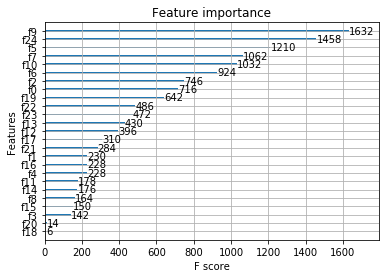

In [149]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)
param = {
    'max_depth': 10,  # the maximum depth of each tree
    'eta': 0.1,  # the training step for each iteration
    'silent': 0,  # loggi4ng mode - quiet
    'objective': 'multi:softprob',# error evaluation for multiclass training
    'num_class' : 2}  # the number of classes that exist in this datset
num_round = 11
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
importance = xgb.plot_importance(bst)
plt.show()
bst.__del__()

In [154]:
print(preds[0:20])
best_preds = np.asarray([np.argmax(line) for line in preds])
print(best_preds[0:20])

[[ 0.24698749  0.75301254]
 [ 0.40823391  0.59176606]
 [ 0.37395033  0.6260497 ]
 [ 0.4755151   0.52448493]
 [ 0.3099283   0.6900717 ]
 [ 0.47521123  0.5247888 ]
 [ 0.67206848  0.32793152]
 [ 0.44119015  0.55880982]
 [ 0.45130304  0.54869694]
 [ 0.3230873   0.67691267]
 [ 0.44537336  0.55462664]
 [ 0.4165405   0.5834595 ]
 [ 0.57659966  0.42340037]
 [ 0.37286335  0.62713671]
 [ 0.38288432  0.61711568]
 [ 0.24698749  0.75301254]
 [ 0.35254848  0.64745152]
 [ 0.42041412  0.57958585]
 [ 0.68593645  0.31406355]
 [ 0.34868234  0.65131766]]
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1]


In [158]:
file = open('C:\\Users\\Всеволод\\Desktop\\Answers.txt', 'w', encoding="utf8")
file.write('POLICY_ID' + ';' + 'POLICY_IS_RENEWED' + ';' + 'POLICY_IS_RENEWED_PROBABILITY' + '\n')
for i in range(id_num.shape[0]):
    file.write(str(int(id_num[i])) + ';' + str(best_preds[i]) + ';' + str(preds[i][1]) + '\n')
file.close()


In [119]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 200
epochs = 12
model = Sequential()
model.add(Dense(25, input_shape=(25,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
        optimizer=keras.optimizers.Adadelta(),
        metrics=['accuracy'])

model.fit(train_x, train_y,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(test_x, test_y))
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 65000 samples, validate on 12407 samples
Epoch 1/12
65000/65000 [==============================] - 1s 18us/step - loss: 0.6814 - acc: 0.6013 - val_loss: 0.6650 - val_acc: 0.6184
Epoch 2/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6617 - acc: 0.6262 - val_loss: 0.6653 - val_acc: 0.6183
Epoch 3/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6614 - acc: 0.6262 - val_loss: 0.6649 - val_acc: 0.6182
Epoch 4/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6616 - acc: 0.6262 - val_loss: 0.6663 - val_acc: 0.6182
Epoch 5/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6613 - acc: 0.6262 - val_loss: 0.6650 - val_acc: 0.6182
Epoch 6/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6613 - acc: 0.6262 - val_loss: 0.6657 - val_acc: 0.6182
Epoch 7/12
65000/65000 [==============================] - 1s 8us/step - loss: 0.6617 - acc: 0.6262 - val_loss: 0.6648 - val_acc: 0.61

In [35]:
print(dir(bst))

['__class__', '__copy__', '__deepcopy__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_validate_features', 'attr', 'attributes', 'best_iteration', 'best_ntree_limit', 'boost', 'copy', 'dump_model', 'eval', 'eval_set', 'feature_names', 'feature_types', 'get_dump', 'get_fscore', 'get_score', 'get_split_value_histogram', 'handle', 'load_model', 'load_rabit_checkpoint', 'predict', 'save_model', 'save_rabit_checkpoint', 'save_raw', 'set_attr', 'set_param', 'update']


In [197]:
id_19 = id_change(19)

{'N': 33305, '0': 44587, '1L': 6790, '1S': 7261, '2': 3746, '3': 788, '4+': 128}
{'N': 0, '0': 1, '1L': 2, '1S': 3, '2': 4, '3': 5, '4+': 6}


In [327]:
id = {}
for i in range(len(dict)):
    word = dict[i][0]
    if(id.get(word) == None):
        id[word] = 1
    else:
        id[word] = id[word] + 1
print(id)

{'TRAIN': 77407, 'TEST ': 19198}
